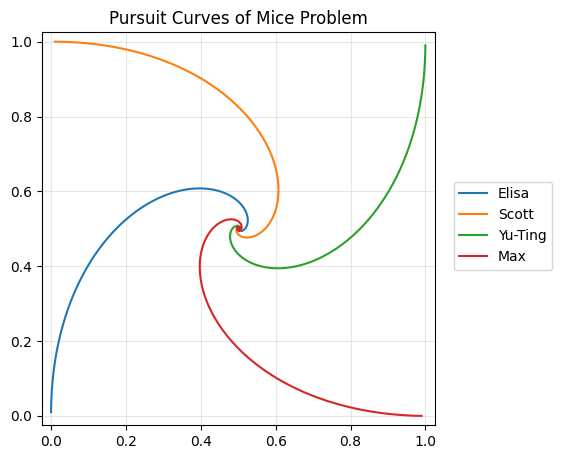

In [14]:
from dcc import Point
import matplotlib.pyplot as plt

# Set up points and targets
A = Point(0, 0)
B = Point(0, 1)
C = Point(1, 1)
D = Point(1, 0)

A.SetTarget(B)
B.SetTarget(C)
C.SetTarget(D)
D.SetTarget(A)

# Simulate
for i in range(1000):
    A.Step()
    B.Step()
    C.Step()
    D.Step()

# Fetch curves
ax, ay = A.GetPursuitCurve()
bx, by = B.GetPursuitCurve()
cx, cy = C.GetPursuitCurve()
dx, dy = D.GetPursuitCurve()

# Create a square figure and enforce equal aspect on the axes
fig, axp = plt.subplots(figsize=(6, 6))  # square figure

l1, = axp.plot(ax, ay, label="Elisa")
l2, = axp.plot(bx, by, label="Scott")
l3, = axp.plot(cx, cy, label="Yu-Ting")
l4, = axp.plot(dx, dy, label="Max")

# Compute square bounds that contain all data
xs = list(ax) + list(bx) + list(cx) + list(dx)
ys = list(ay) + list(by) + list(cy) + list(dy)

xmin, xmax = min(xs), max(xs)
ymin, ymax = min(ys), max(ys)

cx0 = (xmin + xmax) / 2.0
cy0 = (ymin + ymax) / 2.0
half = max(xmax - xmin, ymax - ymin) / 2.0
if half == 0:
    half = 0.1  # fallback if all points equal
half *= 1.05  # small padding

axp.set_xlim(cx0 - half, cx0 + half)
axp.set_ylim(cy0 - half, cy0 + half)

# Make the axes box square regardless of figure window
axp.set_aspect('equal', adjustable='box')

axp.set_title("Pursuit Curves of Mice Problem")
axp.grid(True, alpha=0.3)

# Figure-level legend placed to the right of the axes box
handles = [l1, l2, l3, l4]
labels = [h.get_label() for h in handles]
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.8, 0.5), frameon=True)

# Leave room on the right for the outside legend
fig.subplots_adjust(right=0.78)

plt.show()